# 1. Importação das bibliotecas necessárias

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

### 2. Carregamento do dataset 

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data"
df = pd.read_csv(url)

# 3. Seleção das variáveis preditoras e da variável alvo


In [6]:
# As colunas foram escolhidas com base na correlação com o diagnóstico de Parkinson
colunas = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 
           'MDVP:Jitter(%)', 'MDVP:Shimmer', 'spread1']
X = df[colunas]
y = df['status']  # 1 = com Parkinson, 0 = saudável

### 4. Divisão dos dados em treino (70%) e teste (30%)

In [7]:
# Random_state=42 para garantir reprodutibilidade dos resultados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Criação e treinamento do modelo de Regressão Logística

In [ ]:
# A Regressão Logística para classificação binária (doente/não doente)
# max_iter foi ajustado para 1000 para garantir a convergência do modelo
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# 6. Realização das previsões com o modelo treinado

In [9]:
y_pred = model.predict(X_test)


 ### 7. Avaliação do modelo

In [10]:
# Mostra a acurácia e as métricas de precisão, recall e F1-score
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.864406779661017

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.89      0.53      0.67        15
           1       0.86      0.98      0.91        44

    accuracy                           0.86        59
   macro avg       0.87      0.76      0.79        59
weighted avg       0.87      0.86      0.85        59



# 8. Geração e visualização da matriz de confusão

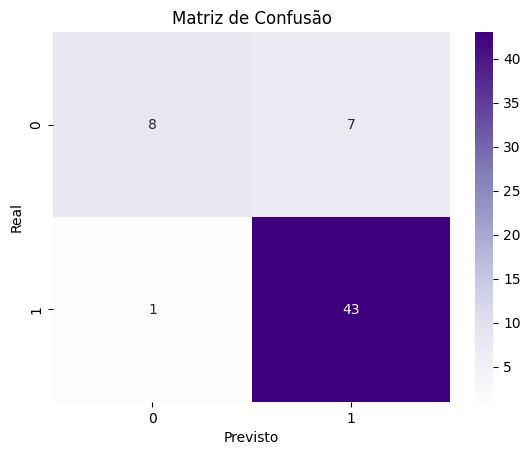

In [11]:
# A matriz mostra os acertos e erros do modelo
cm = confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, fmt='d', cmap='Purples')
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


# 9. Gerar lista de pacientes com e sem Parkinson com base na predição

In [13]:
# Juntar previsões e rótulos reais aos dados de entrada
resultado = X_test.copy()
resultado["real"] = y_test
resultado["previsto"] = y_pred

# Separar pacientes de acordo com a predição
com_parkinson = resultado[resultado["previsto"] == 1]
sem_parkinson = resultado[resultado["previsto"] == 0]

# Exibir um resumo organizado
print(" Pacientes que Possuem Parkinson (previstos pelo modelo):")
print(com_parkinson.reset_index(drop=True)[["MDVP:Fo(Hz)", "MDVP:Jitter(%)", "spread1", "previsto"]].head(10))

print("\n Pacientes que NÃO Possuem Parkinson (previstos pelo modelo):")
print(sem_parkinson.reset_index(drop=True)[["MDVP:Fo(Hz)", "MDVP:Jitter(%)", "spread1", "previsto"]].head(10))


 Pacientes que Possuem Parkinson (previstos pelo modelo):
   MDVP:Fo(Hz)  MDVP:Jitter(%)   spread1  previsto
0      112.239         0.00472 -5.634576         1
1      144.188         0.00544 -5.440040         1
2      117.870         0.00647 -3.583722         1
3      159.116         0.00342 -6.417440         1
4      143.533         0.01101 -5.869750         1
5      121.345         0.00684 -4.865194         1
6      109.860         0.00874 -4.333543         1
7      142.167         0.00369 -5.340115         1
8      204.664         0.00841 -4.876336         1
9      208.519         0.00609 -6.471427         1

 Pacientes que NÃO Possuem Parkinson (previstos pelo modelo):
   MDVP:Fo(Hz)  MDVP:Jitter(%)   spread1  previsto
0      242.852         0.00225 -6.995820         0
1      197.076         0.00289 -7.348300         0
2      240.301         0.00517 -7.169701         0
3      260.105         0.00339 -7.517934         0
4      201.464         0.00198 -7.777685         0
5      237.2